# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd 
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
p = 1/6 # probability
k = 10 # number of trials

sample = np.random.randint(1,7, k)
df = pd.DataFrame(sample)[0].value_counts().sort_index()
df

1    2
2    3
3    3
6    2
Name: 0, dtype: int64

#### 2.- Plot the results sorted by value.

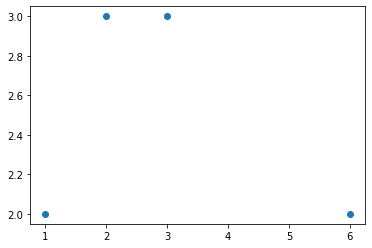

In [3]:
plt.scatter(x=df.index, y=df.values)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

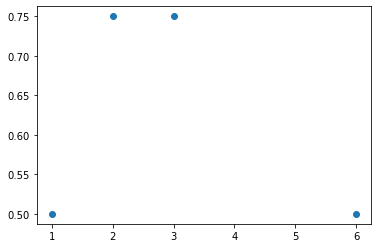

In [4]:
prob = df.values / len(df)

plt.scatter(x=df.index, y=prob)

In [5]:
"""
Since the second graph represents the probability distribution of the data in the first, both graphs have the same shape, with the only difference being the scale of the y axis
"""

'\nSince the second graph represents the probability distribution of the data in the first, both graphs have the same shape, with the only difference being the scale of the y axis\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def my_mean(counts, number_rolled):
    return np.sum(counts * number_rolled)/sum(counts)

my_mean(df, df.index)

2.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# Step 1: frequency distribution
freq_dist = df.apply(lambda x : x / sum(df))

#Step 2: calculate the mean
calculated_mean = sum(freq_dist.index * freq_dist.values)
calculated_mean

2.9000000000000004

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
new_df = df.reset_index()
new_df.columns = ['roll', 'counts']
new_df

,roll,counts
0,1,2
1,2,3
2,3,3
3,6,2


In [9]:
n = new_df['counts'].sum()
array = []

for line in new_df.iterrows():
    for i in range(0,line[1][1]):
        array.append(line[1][0])

array

[1, 1, 2, 2, 2, 3, 3, 3, 6, 6]

In [10]:
def recursive_median(array):
    local_array = array[:]
    #print(local_array)
    if len(local_array) == 1:
        return local_array[0]
    elif len(local_array) == 2:
        return (local_array[0] + local_array[1]) / 2
    else:
        local_array.pop(len(local_array)-1)
        local_array.pop(0)

        return recursive_median(local_array)
    
recursive_median(array)

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
n = len(array)
q1 = recursive_median(array[0:int((n+1)/2)])
median = recursive_median(array)
q3 = recursive_median(array[int((n+1)/2):])
q4 = array[(n-1)]


print('Q1: ', q1)
print('Median: ', median)
print('Q3: ', q3)
print('Q4: ', q4)


'''
# For reference:
np_q1 = np.quantile(array, 0.25, interpolation='midpoint')
np_q2 = np.quantile(array, 0.5, interpolation='midpoint')
np_q3 = np.quantile(array, 0.75, interpolation='midpoint')
np_q4 = np.quantile(array, 1, interpolation='midpoint')
print(f'\nNumpy calculated quartiles: \nQ1: {np_q1}\nQ2: {np_q2}\nQ3: {np_q3}\nQ4: {np_q4}')
'''

Q1:  2
Median:  2.5
Q3:  3
Q4:  6


"\n# For reference:\nnp_q1 = np.quantile(array, 0.25, interpolation='midpoint')\nnp_q2 = np.quantile(array, 0.5, interpolation='midpoint')\nnp_q3 = np.quantile(array, 0.75, interpolation='midpoint')\nnp_q4 = np.quantile(array, 1, interpolation='midpoint')\nprint(f'\nNumpy calculated quartiles: \nQ1: {np_q1}\nQ2: {np_q2}\nQ3: {np_q3}\nQ4: {np_q4}')\n"

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

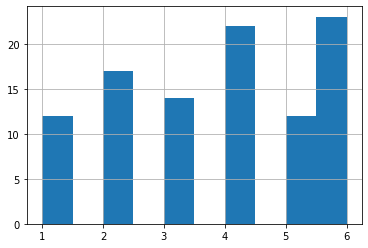

In [12]:
df = pd.read_csv('../data/roll_the_dice_hundred.csv')
df.sort_values('value')
df['value'].hist()

In [13]:
"""
The histogram shows how many times each number was rolled.
It seems to be a uniform distribution, but we would need more data to confirm it.
"""

'\nThe histogram shows how many times each number was rolled.\nIt seems to be a uniform distribution, but we would need more data to confirm it.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:

df_counts = df.groupby('value').count()

my_mean(df['roll'], df['value'])

3.7248484848484846

#### 3.- Now, calculate the frequency distribution.


In [15]:
freq_dist = df_counts['roll'].apply(lambda x : x / sum(df_counts['roll']))
freq_dist

value
1    0.12
2    0.17
3    0.14
4    0.22
5    0.12
6    0.23
Name: roll, dtype: float64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:xlabel='value'>

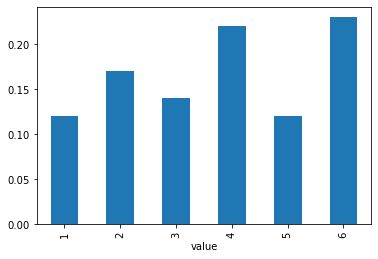

In [16]:
freq_dist.plot.bar()


In [17]:
"""
Probabilities for each value the dye can stop on
"""

'\nProbabilities for each value the dye can stop on\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [18]:
# Printed above

In [19]:
"""
The shape is the same as the histograms of the values.
"""

'\nThe shape is the same as the histograms of the values.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [53]:
ages = pd.read_csv('../data/ages_population.csv')
age_dist = ages.groupby('observation')['observation'].count()
print(age_dist)


observation
1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: observation, Length: 72, dtype: int64


<AxesSubplot:ylabel='Frequency'>

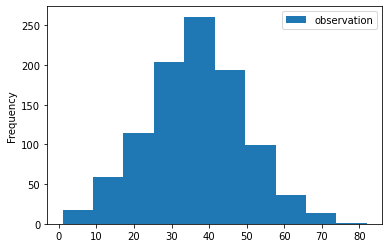

In [54]:
ages.plot.hist()

In [22]:
# I guess the mean will be around 40 and the standard dev will be close to 10

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [58]:
mean = np.mean(ages['observation'])
std_dev = np.std(ages['observation'])
print(f'The mean of the observations is {mean:.4g} and the standard deviation is {std_dev:.4g}')

The mean of the observations is 36.56 and the standard deviation is 12.81


In [24]:
"""
The mean is a bit lower than I expected, but the standard deviation is a bit higher
"""

'\nThe mean is within the range I expected, but the standard deviation is a bit higher than I expected\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [25]:
ages2 = pd.read_csv('../data/ages_population2.csv')
age_dist2 = ages2.groupby('observation')['observation'].count()
print(age_dist2)


observation
19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: observation, dtype: int64


<AxesSubplot:ylabel='Frequency'>

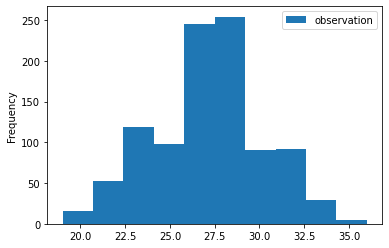

In [59]:
ages2.plot.hist(bins=10)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [60]:
"""
The mean is lower than the first, and so seems to be the standard deviation
"""

'\nThe mean is lower than the first, and so seems to be the standard deviation\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [61]:
mean = np.mean(ages2['observation'])
std_dev = np.std(ages2['observation'])
print(f'The mean of the observations is {mean:.4g} and the standard deviation is {std_dev:.4g}')

The mean of the observations is 27.16 and the standard deviation is 2.968


In [29]:
"""
Pretty much what I expected earlier, lower mean and way lower standard deviation
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [62]:
ages3 = pd.read_csv('../data/ages_population3.csv')
age_dist3 = ages3.groupby('observation')['observation'].count()
print(age_dist3)


observation
1.0     1
2.0     2
4.0     2
5.0     1
7.0     1
       ..
73.0    6
74.0    6
75.0    2
76.0    1
77.0    2
Name: observation, Length: 75, dtype: int64


<AxesSubplot:ylabel='Frequency'>

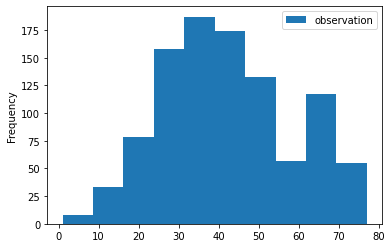

In [63]:
ages3.plot.hist(bins=10)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [64]:
mean = np.mean(ages3['observation'])
std_dev = np.std(ages3['observation'])
print(f'The mean of the observations is {mean:.4g} and the standard deviation is {std_dev:.4g}')

The mean of the observations is 41.99 and the standard deviation is 16.14


In [66]:
"""
Both the mean and standard deviation are higher than the first set
"""

'\nBoth the mean and standard deviation are higher than the first set\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [70]:
quart_dict = {}
for i in range(1,5):
    quart_dict[f'Q{i}'] = np.quantile(ages3, i * 0.25)

quart_dict

{'Q1': 30.0, 'Q2': 40.0, 'Q3': 53.0, 'Q4': 77.0}

In [34]:
"""
The median matches my response for what I expected the mean to be. 
######## Compare the first and last quartiles
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [35]:
# your code here

In [36]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [37]:
# your code here

In [38]:
"""
your comments here
"""

'\nyour comments here\n'